In [20]:
from sklearn.model_selection import train_test_split

from data_utils import create_directory_structure, identify_duplicates
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import matplotlib.pyplot as plt
import itertools

In [21]:
image_dir = 'D:/Nam4/KLTN/Dataset/HAM10000_images'
metadata_csv = 'D:/Nam4/KLTN/Dataset/HAM10000_metadata.csv'

df_data = pd.read_csv(metadata_csv)
train_dir, val_dir = create_directory_structure()


In [22]:
identify_duplicates(df_data)

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,yes
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,yes
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,yes
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,yes
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,yes
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,yes
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,yes
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,yes
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,yes


In [23]:
df_data['duplicates'].value_counts()

duplicates
no     5514
yes    4501
Name: count, dtype: int64

In [24]:
df = df_data[df_data['duplicates'] == 'no']

df.shape

(5514, 8)

In [25]:
#Tạo một tập hợp val bằng df vì đảm bảo rằng không có hình ảnh nào trong số này 
# có augmented duplicates trong  train set
y = df['dx']    

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(938, 8)

In [26]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

In [27]:
# Tập dữ liệu df_train sẽ là df_data loại bỏ hết các dòng có trong tập val

# Hàm xác định một ảnh thuộc tập train hay tập val
def identify_val_rows(x):
    # Tạo danh sách tất cả image_id trong tập validation
    val_list = list(df_val['image_id'])
    
    # Nếu image_id có trong danh sách val_list, gán là 'val'
    if str(x) in val_list:
        return 'val'
    else:
        # Ngược lại gán là 'train'
        return 'train'

# Xác định ảnh nào thuộc train và val

# Tạo một cột mới 'train_or_val', sao chép từ cột 'image_id'
df_data['train_or_val'] = df_data['image_id']

# Áp dụng hàm identify_val_rows để gán nhãn 'train' hoặc 'val' cho từng dòng
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)

# Lọc ra các dòng thuộc tập train
df_train = df_data[df_data['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))


9077
938


In [28]:
df_train['dx'].value_counts()

dx
nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: count, dtype: int64

In [29]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

### Transfer the Images into the Folders

In [30]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [31]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('D:/Nam4/KLTN/Dataset/ham10000_images_part_1')
folder_2 = os.listdir('D:/Nam4/KLTN/Dataset/ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('D:/Nam4/KLTN/Dataset/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

In [32]:
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
1074
1024
484
301
131
109


In [33]:
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


### Copy the train images  into aug_dir

In [34]:
# Lưu ý rằng chúng ta không tăng cường dữ liệu cho lớp 'nv'
class_list = ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

for item in class_list:
    
    # Tạo các thư mục tạm thời vì chúng ta sẽ xóa chúng sau này
    # Tạo thư mục gốc tạm thời
    aug_dir = 'aug_dir'
    os.makedirs(aug_dir, exist_ok=True)
    # Tạo thư mục con để lưu các ảnh của cùng một lớp
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.makedirs(img_dir, exist_ok=True)

    # Chọn một lớp (ví dụ: 'mel', 'bkl', ...)
    img_class = item

    # Liệt kê tất cả ảnh trong thư mục train của lớp đó
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Sao chép ảnh từ thư mục train của lớp vào img_dir tạm thời
    for fname in img_list:
        # Đường dẫn nguồn tới ảnh
        src = os.path.join('base_dir/train_dir/' + img_class, fname)
        # Đường dẫn đích tới ảnh
        dst = os.path.join(img_dir, fname)
        # Sao chép ảnh từ nguồn tới đích
        shutil.copyfile(src, dst)

    # Trỏ tới thư mục chứa ảnh (không trỏ trực tiếp tới ảnh)
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Tạo một generator để sinh ảnh tăng cường
    datagen = ImageDataGenerator(
        rotation_range=180,        # Xoay ngẫu nhiên trong khoảng 0-180 độ
        width_shift_range=0.1,     # Dịch ngang tối đa 10% chiều rộng
        height_shift_range=0.1,    # Dịch dọc tối đa 10% chiều cao
        zoom_range=0.1,            # Phóng to/thu nhỏ tối đa 10%
        horizontal_flip=True,      # Lật ngang ngẫu nhiên
        vertical_flip=True,        # Lật dọc ngẫu nhiên
        fill_mode='nearest'        # Điền khoảng trống bằng giá trị gần nhất
    )

    batch_size = 50

    # Tạo một generator từ thư mục ảnh
    aug_datagen = datagen.flow_from_directory(
        path,
        save_to_dir=save_path,    # Lưu ảnh tăng cường vào thư mục của lớp tương ứng
        save_format='jpg',
        target_size=(224, 224),   # Resize ảnh về kích thước 224x224
        batch_size=batch_size
    )

    # Xác định số lượng ảnh tăng cường mong muốn
    num_aug_images_wanted = 6000  # Tổng số lượng ảnh mong muốn cho mỗi lớp

    # Số lượng ảnh hiện có trong lớp đó
    num_files = len(os.listdir(img_dir))
    # Tính số batch cần sinh ra để đạt đủ số lượng ảnh mong muốn
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # Chạy generator để tạo thêm ảnh tăng cường cho đến khi đủ ~6000 ảnh
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # Xóa thư mục tạm chứa ảnh gốc sau khi tăng cường xong
    shutil.rmtree('aug_dir')


Found 1074 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


In [35]:

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
5920
5920
5858
5217
5290
4410


In [36]:
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


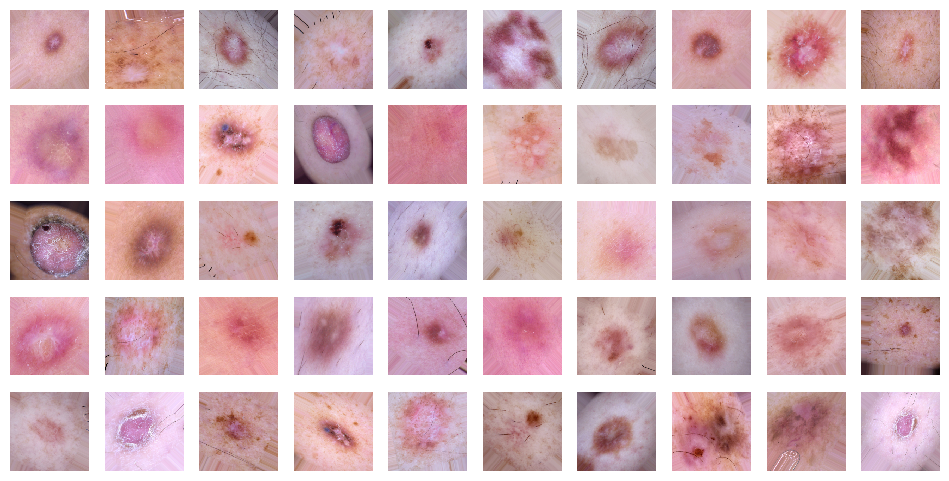

In [37]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
# Example: Displaying images from the augmented directory
plots(imgs, titles=None)  # titles=labels will display the image labels

### Build model

In [38]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = int(np.ceil(num_train_samples / train_batch_size))
val_steps = int(np.ceil(num_val_samples / val_batch_size))


In [39]:
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [40]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,
                                            class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,
                                            class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)


# Chuyển đổi train_batches thành tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_signature=(
        tf.TensorSpec(shape=(None, image_size, image_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)  # 7 là số lớp
    )
)

# Chuyển đổi valid_batches thành tf.data.Dataset
valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_batches,
    output_signature=(
        tf.TensorSpec(shape=(None, image_size, image_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)
    )
)

Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [41]:
for images, labels in train_batches:
    print("Type of images:", type(images))
    print("Type of labels:", type(labels))
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)
    break

Type of images: <class 'numpy.ndarray'>
Type of labels: <class 'numpy.ndarray'>
Shape of images: (10, 224, 224, 3)
Shape of labels: (10, 7)


In [42]:
def get_model():
    # Tao base model
    base_model = tf.keras.applications.mobilenet.MobileNet()
    
    # Lay cac layer cuoi cung cua base model
    x = base_model.layers[-6].output

    # Lam giam kich thuoc cua x
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Dropout layer
    x = Dropout(0.25)(x)    

    # Dense layer voi activation la softmax
    predictions = Dense(7, activation='softmax')(x)

    # Dong bang cac layer cua base model
    for layer in base_model.layers[:-23]:
        layer.trainable = False

    # Tao model chinh
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [43]:
model = get_model()

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

### Train the Model

In [45]:
# Define Top2 va top3 accuracy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [46]:
model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])


In [47]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [48]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 5.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 2.0, # vasc
}

In [49]:
for images, labels in train_batches:
    print("Image shape:", images.shape)  # Dạng (batch_size, height, width, channels)
    print("Label shape:", labels.shape)  # Dạng (batch_size, num_classes)
    break

Image shape: (10, 224, 224, 3)
Label shape: (10, 7)


In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(
    train_dataset,
    steps_per_epoch=train_steps,
    validation_data=valid_dataset,
    validation_steps=val_steps,
    epochs=30,
    verbose=1,
    callbacks=callbacks_list,
    class_weight=class_weights
)

Epoch 1/30


908/908 [==============================] - ETA: 0s - loss: 2.2379 - categorical_accuracy: 0.5072 - top_2_accuracy: 0.7063 - top_3_accuracy: 0.8311
Epoch 1: val_top_3_accuracy improved from -inf to 0.96162, saving model to model2.h5
908/908 [==============================] - 158s 170ms/step - loss: 2.2379 - categorical_accuracy: 0.5072 - top_2_accuracy: 0.7063 - top_3_accuracy: 0.8311 - val_loss: 0.5488 - val_categorical_accuracy: 0.8060 - val_top_2_accuracy: 0.9243 - val_top_3_accuracy: 0.9616 - lr: 0.0100
Epoch 2/30


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


908/908 [==============================] - ETA: 0s - loss: 1.5050 - categorical_accuracy: 0.6186 - top_2_accuracy: 0.8131 - top_3_accuracy: 0.9128
Epoch 2: val_top_3_accuracy improved from 0.96162 to 0.96588, saving model to model2.h5
908/908 [==============================] - 145s 159ms/step - loss: 1.5050 - categorical_accuracy: 0.6186 - top_2_accuracy: 0.8131 - top_3_accuracy: 0.9128 - val_loss: 0.6049 - val_categorical_accuracy: 0.7964 - val_top_2_accuracy: 0.9051 - val_top_3_accuracy: 0.9659 - lr: 0.0100
Epoch 3/30
908/908 [==============================] - ETA: 0s - loss: 1.3307 - categorical_accuracy: 0.6474 - top_2_accuracy: 0.8367 - top_3_accuracy: 0.9301
Epoch 3: val_top_3_accuracy improved from 0.96588 to 0.97015, saving model to model2.h5
908/908 [==============================] - 157s 173ms/step - loss: 1.3307 - categorical_accuracy: 0.6474 - top_2_accuracy: 0.8367 - top_3_accuracy: 0.9301 - val_loss: 0.5727 - val_categorical_accuracy: 0.7932 - val_top_2_accuracy: 0.9328 -

In [50]:
from tensorflow.keras.models import load_model

model = load_model('model.h5', custom_objects={'top_2_accuracy': top_2_accuracy,'top_3_accuracy': top_3_accuracy})

In [51]:
model.metrics_names

['loss', 'categorical_accuracy', 'top_2_accuracy', 'top_3_accuracy']

In [52]:
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)


938/938 [==============================] - 22s 22ms/step - loss: 0.3682 - categorical_accuracy: 0.8795 - top_2_accuracy: 0.9595 - top_3_accuracy: 0.9861
val_loss: 0.36819785833358765
val_cat_acc: 0.8795309066772461
val_top_2_acc: 0.9594882726669312
val_top_3_acc: 0.9861407279968262


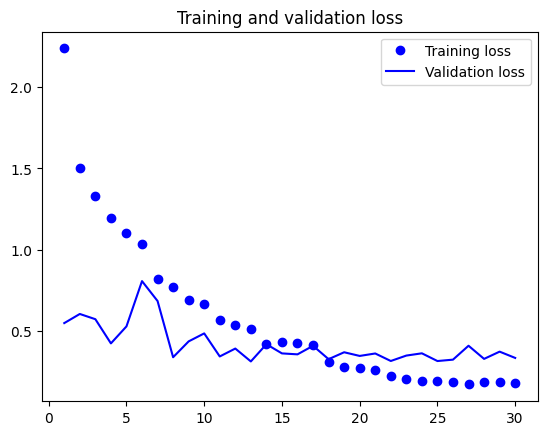

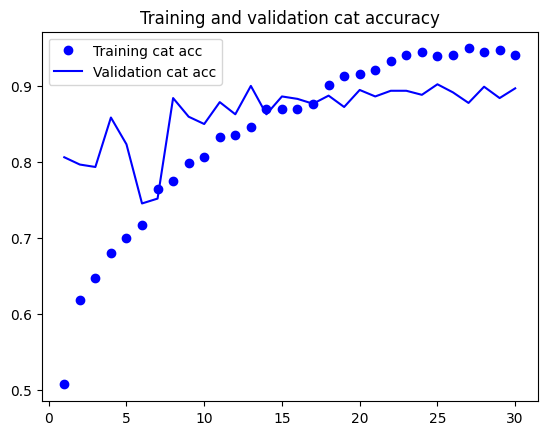

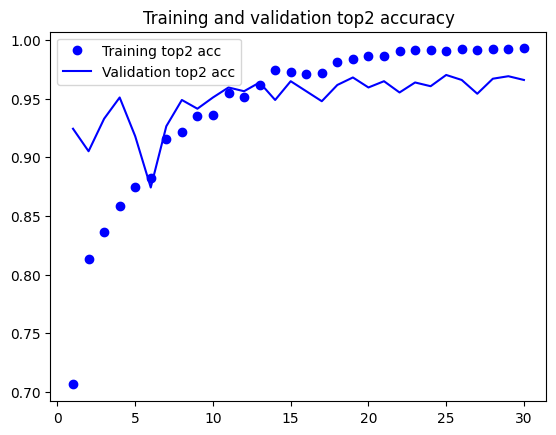

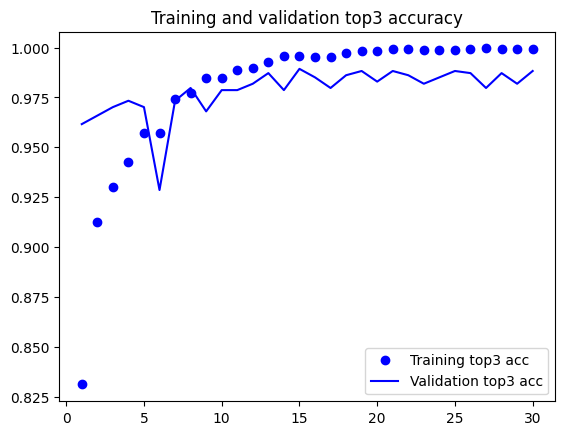

In [29]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

In [53]:
test_labels = test_batches.classes

In [54]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [55]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [56]:
predictions = model.predict(test_batches, steps=len(df_val), verbose=1)

938/938 [==============================] - 20s 21ms/step


In [57]:
predictions.shape

(938, 7)

In [58]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [59]:
test_labels.shape

(938,)

In [60]:
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import matplotlib.pyplot as plt

In [61]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [62]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[ 10   3   3   0   9   1   0]
 [  1  23   4   0   1   1   0]
 [  1   0  43   0  18  13   0]
 [  0   0   0   3   0   3   0]
 [  0   2   2   0  27   8   0]
 [  0   5   6   1  29 709   1]
 [  0   0   0   0   0   1  10]]


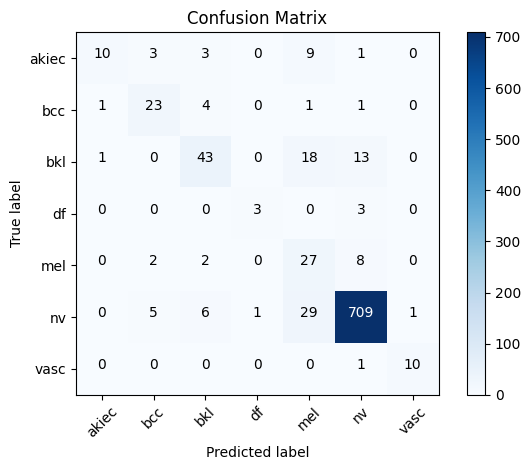

In [63]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#### Ứng dụng Inductive Conformal Prediction

In [64]:
def data_generator(dataset):
    iterator = iter(dataset)
    
    while True:
        try:
            batch = next(iterator)
            yield batch[0], batch[1] 
        except StopIteration:
            break

In [65]:
# Lấy 20% ảnh từ train_dataset để calibration
calib_images = 8400  # 42000 * 0.2 = 8400

X_cal, y_cal = [], []
for X_batch, y_batch in data_generator(train_dataset):
    X_cal.extend(X_batch)
    y_cal.extend(y_batch)
    if len(X_cal) >= calib_images:
        break

X_cal = np.array(X_cal[:calib_images])
y_cal = np.array(y_cal[:calib_images])

In [82]:
import importlib
import conformal_utils
importlib.reload(conformal_utils)

<module 'conformal_utils' from 'd:\\Nam4\\KLTN\\Skin_Cancer_Classification_Conformal_1\\conformal_utils.py'>

In [83]:
from conformal_utils import InductiveConformalPredictor
icp = InductiveConformalPredictor(model, batch_size=64)
print("Fitting conformal predictor...")
icp.fit(X_cal, y_cal)


Fitting conformal predictor...


In [84]:
def save_icp_config(icp, epsilon):
    filename = f"icp_eps_{epsilon:.2f}.npz"
    np.savez(filename,
             scores=icp.nc_scorer.nc_scores,
             threshold=icp.nc_scorer.thresholds[epsilon],
             n_classes=icp.n_classes)
    print(f"Saved ICP config for epsilon={epsilon} to {filename}")

In [85]:
def evaluate_icp_batch(prediction_sets, y_true, n_classes):
    count = len(prediction_sets)
    correct = sum(y in pred for y, pred in zip(y_true, prediction_sets))
    size_sum = sum(len(pred) for pred in prediction_sets)

    one_label = sum(len(pred) == 1 for pred in prediction_sets)
    multi_label = sum(len(pred) > 1 for pred in prediction_sets)
    no_label = sum(len(pred) == 0 for pred in prediction_sets)

    return {
        'coverage_sum': correct,
        'size_sum': size_sum,
        'count': count,
        'one_label': one_label,
        'multi_label': multi_label,
        'no_label': no_label
    }

In [86]:
def batch_data_generator(batches):
    for batch in batches:
        yield batch

In [87]:
def collect_batch_results(icp, test_batches, epsilon, n_classes, max_batches=2000):
    total = {
        'coverage_sum': 0,
        'size_sum': 0,
        'count': 0,
        'one_label': 0,
        'multi_label': 0,
        'no_label': 0
    }
    current_batch = 0

    for X_batch, y_batch in batch_data_generator(test_batches):
        y_indices = np.argmax(y_batch, axis=1)
        prediction_sets = icp.predict_batch(X_batch, significance=epsilon)
        batch_result = evaluate_icp_batch(prediction_sets, y_indices, n_classes)

        for k in total:
            total[k] += batch_result[k]

        current_batch += 1
        if current_batch >= max_batches:
            break

    return total


In [88]:
def compute_set_metrics(total, n_classes):
    count = total['count']
    avg_set_size = total['size_sum'] / count
    coverage = total['coverage_sum'] / count
    efficiency = 1 - avg_set_size / n_classes

    return {
        'Coverage': coverage,
        'Average Set Size': avg_set_size,
        'Efficiency': efficiency,
        'Samples': count
    }

In [89]:
def compute_icp_metrics(total, n_classes, epsilon):
    count = total['count']
    confident_level = f"{int((1 - epsilon) * 100)}%"

    return {
        'Confident Level': confident_level,
        'Error Rate': 1 - total['coverage_sum'] / count,
        'Only One Label (%)': 100 * total['one_label'] / count,
        'More Than One Label (%)': 100 * total['multi_label'] / count,
        'No Label (%)': 100 * total['no_label'] / count
    }

In [90]:
def evaluate_icp_on_test(icp, test_batches, epsilon, n_classes, max_batches=2000):
    total = collect_batch_results(icp, test_batches, epsilon, n_classes, max_batches)
    metrics1 = compute_set_metrics(total, n_classes)
    metrics2 = compute_icp_metrics(total, n_classes, epsilon)
    return {**{'Confident Level': metrics2['Confident Level']}, **metrics1, **metrics2}

In [92]:
epsilons = [0.1, 0.05, 0.01]

for eps in epsilons:
    if eps not in icp.nc_scorer.thresholds:
        icp.nc_scorer.calculate_threshold(eps)
    
    save_icp_config(icp, eps)


Saved ICP config for epsilon=0.1 to icp_eps_0.10.npz
Saved ICP config for epsilon=0.05 to icp_eps_0.05.npz
Saved ICP config for epsilon=0.01 to icp_eps_0.01.npz


In [91]:
epsilons = [0.1, 0.05, 0.01]
results = []

print("\n--- Đánh giá ICP theo các mức ý nghĩa ---")
for eps in epsilons:
    print(f"\n=> Đang đánh giá với epsilon = {eps} ...")
    result = evaluate_icp_on_test(icp, test_batches, epsilon=eps, n_classes=y_cal.shape[1])
    results.append(result)



--- Đánh giá ICP theo các mức ý nghĩa ---

=> Đang đánh giá với epsilon = 0.1 ...

=> Đang đánh giá với epsilon = 0.05 ...

=> Đang đánh giá với epsilon = 0.01 ...


In [93]:
df_results = pd.DataFrame(results)
print("\nKết quả đánh giá ICP ở các mức ý nghĩa:")
df_results


Kết quả đánh giá ICP ở các mức ý nghĩa:


,Confident Level,Coverage,Average Set Size,Efficiency,Samples,Error Rate,Only One Label (%),More Than One Label (%),No Label (%)
0,90%,0.8960,1.0635,0.848071,2000,0.1040,93.15,6.60,0.25
1,95%,0.9370,1.2465,0.821929,2000,0.0630,78.65,21.35,0.00
2,99%,0.9795,1.6060,0.770571,2000,0.0205,60.60,39.40,0.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.827451..0.94509804].


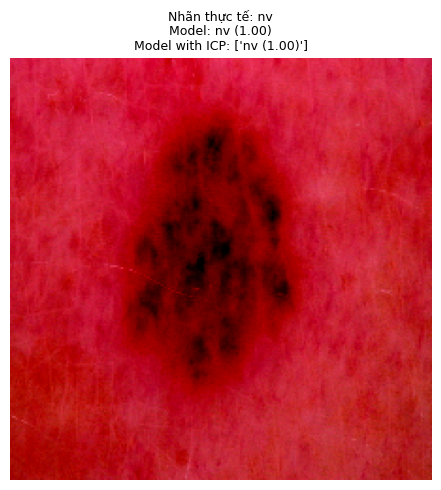

In [110]:
import matplotlib.pyplot as plt

# Lấy một batch từ test set
X_batch, y_batch = next(data_generator(test_batches))
y_true = np.argmax(y_batch, axis=1)

# Dự đoán bằng ICP
significance = 0.05
prediction_sets = icp.predict_batch(X_batch, significance)

# Dự đoán top-1 bằng mô hình gốc
probs = model.predict(X_batch, verbose=0)
top1_preds = np.argmax(probs, axis=1)

# Nhãn lớp
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Hiển thị một ảnh duy nhất
i = 0  # chỉ số ảnh trong batch
plt.figure(figsize=(5, 5))
plt.imshow(X_batch[i])
plt.axis('off')

true_label = class_labels[y_true[i]]
top1_label = class_labels[top1_preds[i]]
icp_pred_info = [f"{class_labels[j]} ({probs[i][j]:.2f})" for j in prediction_sets[i]]

plt.title(
    f"Nhãn thực tế: {true_label}\n"
    f"Model: {top1_label} ({probs[i][top1_preds[i]]:.2f})\n"
    f"Model with ICP: {icp_pred_info}",
    fontsize=9
)

plt.tight_layout()
plt.show()
